In [76]:
import tensorflow as tf
import numpy as np

In [2]:
t=[0,0,1,0,0,0,0,0,0,0] # 원핫인코딩 , 1이 하나 1이 있는 위치 2 즉 2가 정답
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]#소프트맥스함수로 출력 이는 곧 출력 가능성


In [13]:
#평균 제곱 오차 MSE
def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)


In [14]:
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]#2일 확률이 가장 높다고 추정함 

mean_squared_error(np.array(y),np.array(t))


0.09750000000000003

In [15]:
y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]#7일 확률이 가장 높다고 추정함

mean_squared_error(np.array(y),np.array(t)) # 즉 첫번째 추정결과가 정답에 더 가까움

0.5975

In [16]:
# 교차 엔트로피 오차 CEE
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))#델타라는 아주 작은 값을 넣은 이유는 np.log()가 0이되면 -inf여서 계산이 안됨

In [18]:
t=[0,0,1,0,0,0,0,0,0,0] 
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
cross_entropy_error(np.array(y),np.array(t))


0.510825457099338

In [19]:

y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
cross_entropy_error(np.array(y),np.array(t))#이것 역시 평균제곱오차의 판단과 일치

2.302584092994546

In [77]:
#미니배치
import sys,os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)
print(x_train.shape)
print(t_train.shape)#훈련데이터 6만개 입력데이터 784, 정답레이블 10줄짜리

train_size = x_train.shape[0]
batch_size = 10
batch_max = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_max]
t_batch = t_train[batch_max]

np.random.choice(60000,10)# 무작위로 10개 골라내기


(60000, 784)
(60000, 10)


array([43037, 39301, 37665, 43516, 47392, 44270, 26038, 21122, 45063,
       37581])

In [29]:
#4.2.4 교차엔트로피 오차 구하기 (??? 이해안됨)
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t=t.reshape(1,t.size)
        print(t)
        y=y.reshape(1,y.size)
        print(y)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

In [30]:
#4.3.1미분
def numerical_diff(f,x): #매개변수 f는 미분할 함수, x는 함수에 넘길 인수
    h = 10e-50#가능한 0애 가까운 값을 넣고 싶지만 오류가 있다.
    return(f(x+h)-f(x))/h #h가 0이 아니기 때문에 이는 곧 x+h 와 x 사이의 기울기가 나옴 

In [31]:
def numerical_diff(f,x): #
    h = 1e-4#10^-4을 하면 통상적으로 좋은 결과를 구할 수 있음
    return(f(x+h)-f(x-h))/(2*h) #중심차분을 통해 정확한 x의 기울기를 구함


In [78]:
import matplotlib.pylab as plt

In [32]:
#수치 미분의 예
def function_1(x):
    return 0.01*x**2 +0.1*x

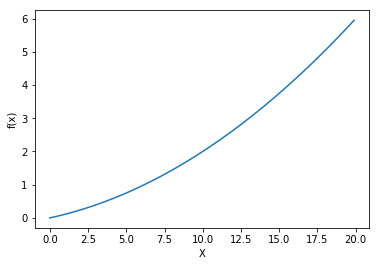

In [34]:
#위 함수 그리기
x = np.arange(0.0,20.0,0.1)#0부터 20까지 0.1의 간격의 배열
y = function_1(x)
plt.xlabel("X")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

0.1999999999990898


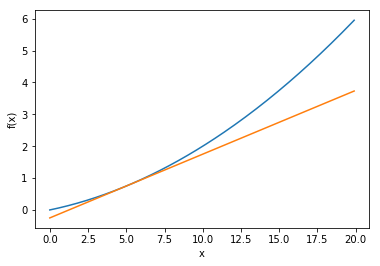

In [79]:
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [39]:
#편미분
def function_2(x): # f(x1,x2) = x1^2 + x2^2
    return np.sum(x**2)

In [41]:
def function_tmp1(x0): #x0 = 3 x1 = 4 일떄 x0에대한 편미분
        return x0*x0 + 4.0**2

numerical_diff(function_tmp1,3.0)

6.00000000000378

In [42]:
def function_tmp2(x1): #x1에 대한 편미분
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2,4.0)

7.999999999999119

In [43]:
#4.4 기울기 
def numerical_gradient(f,x):#x의 각 원소에 대해서 수치 미분 
    h = 1e-4
    grad = np.zeros_like(x)# x와 형상이 같고 그 원소가 모두 0인 배열 생성
    
    for idx in range(x.size):
        tmp_val = x[idx] #f(x+h)계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        #f(x-h)계산
        x[idx] = tmp_val -h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2)/(2*h)
        x[idx] = tmp_val # 값을 다시 복원
    return grad


In [80]:
numerical_gradient(function_2,np.array([3.0,4.0]))#(3,4)에서의 기울기


array([6., 8.])

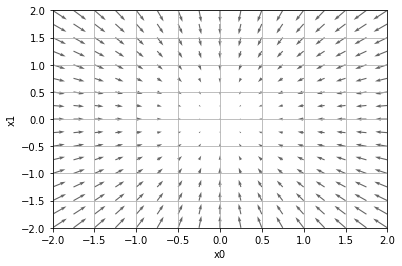

In [46]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

In [57]:
#경사하강법 
def gradient_descent(f,init_x,lr=0.01,step_num=100):
#f 는 최적화 하려는 함수
#init_x 는 초깃값
#lr 은 학습률
#step_num  경사법의 따른 반복횟수
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -=lr*grad
    return x
        # 기울기를 구하고 학습률을 곱하여 갱신 이 갱신을 step- num 만큼 반복

In [58]:
#f(x0,x1) = x0^2 + x1^2 최솟값 구하기
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0,4.0])

gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)#거의 (0,0)에 근접함 실제로 최솟값은 (0,0)

array([-6.11110793e-10,  8.14814391e-10])

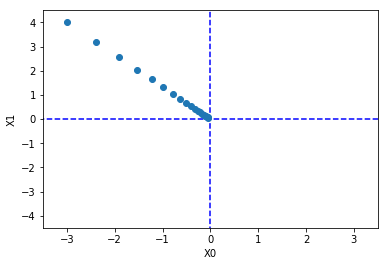

In [60]:
import numpy as np
import matplotlib.pylab as plt



def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [61]:
init_x = np.array([-3.0,4.0])#학습률이 너무 큰 경우 너무 큰값으로 발산해버림

gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

(array([-2.58983747e+13, -1.29524862e+12]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [ 5.70000000e+01, -7.60000000e+01],
        [-1.08300000e+03,  1.44400000e+03],
        [ 2.05770000e+04, -2.74360000e+04],
        [-3.90963008e+05,  5.21284002e+05],
        [ 7.42829664e+06, -9.90439654e+06],
        [-1.41137328e+08,  1.88183103e+08],
        [ 2.68126267e+09, -3.57501690e+09],
        [-5.09763373e+10,  6.79001831e+10],
        [ 9.45170863e+11, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.295

In [62]:
init_x = np.array([-3.0,4.0])#학습률이 너무 작으면 거의 갱신이 안됨

gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

(array([-2.99999994,  3.99999992]), array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999998,  3.99999998],
        [-2.99999998,  3.9999

In [63]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.03370167  0.26191017 -0.29561184]
 [ 0.05055251  0.39286525 -0.44341776]]


In [69]:
#신경망에서의 기울기
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)#정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)#예측

    def loss(self, x, t):#손실함수 값을 구함 
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

net = simpleNet()
print(net.W)#가중치 

x = np.array([0.6,0.9])
p = net.predict(x)
print(p)
np.argmax(p)#최댓값의 인덱스
t=np.array([0,0,1])#정답 데이터
net.loss(x,t)


[[ 0.64716209 -1.37214297  0.20641842]
 [-0.36376456  0.38081398  0.64201   ]]
[ 0.06090916 -0.48055321  0.70166005]


0.6062243632705681

In [70]:
def f(W):
    return net.loss(x,t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.17242356  0.1003327  -0.27275626]
 [ 0.25863535  0.15049905 -0.4091344 ]]


In [85]:
#two-hidden layer
import sys,os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,weight_init_std=0.01):
        #가중치 초기화
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size,hidden_size)#0과 1사이의 값을 랜덤하게 배열의 크기는 입력층 뉴런수 곱하기 은닉층 뉴런수
        self.params["b1"] = np.zeros(hidden_size)#은닉층의 사이즈 만큼 영인 배열 생성
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size,output_size)
        self.params["b2"] = np.zeros(output_size)
    
    def predict(self,x): # 예측!!
        W1,W2 = self.params["W1"],self.params["W2"]
        b1,b2 = self.params['b1'],self.params["b2"]
        a1 = np.dot(x,W1)+b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2)+b2
        y = softmax(a2)
        
        return y
    
    def loss(self,x,t): # 손실 함수 x는 입력, t는 정답 데이터
        y = self.predict(x)
        return cross_entropy_error(y,t)
    def accuracy(self,x,t): # 예측은 정확도를 계산
        y = self.predict(x)
        y = np.argmax(y,axis = 1)# argmax 는 배열중에서 가장 큰 값의 위치를 반환
        #axis 는  축 즉 배열의 차원 , rank는 축의 개수
        t = np.argmax(t,axis = 1)
        
        accuracy = np.sum(y==t)/float(x.shape[0])
        return accuracy
    def numerical_gradient(self,x,t): r
        loss_W = lambda W : self.loss(x,t)
        
        grads = {}#기울기를 딕셔너리로 저장
        grads['W1'] = numerical_gradient(loss_W, self.params["W1"])
        grads['b1'] = numerical_gradient(loss_W, self.params["b1"])
        grads['W2'] = numerical_gradient(loss_W, self.params["W2"])
        grads['b2'] = numerical_gradient(loss_W, self.params["b2"])
        
        return grads
    
    
        

In [87]:
net = TwoLayerNet(input_size=784,hidden_size=100,output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)


(10,)

In [94]:
x=np.random.rand(100,784)#0-1사이의 값을 랜덤으로 100*784배열을 생성
y=net.predict(x)

t=np.random.rand(100,10)#여기서 100은 더미 
grads = net.numerical_gradient(x,t)
print(grads["W1"].shape)
print(grads["b1"].shape)
print(grads["W2"].shape)
print(grads["b2"].shape)



(784, 100)
(100,)
(100, 10)
(10,)


In [ ]:
# 미니배치 !!
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

#하이퍼 파리미터
iters_num = 10000#반복수  반복해서 학습을 많이 할수록 손실함수가 줄어들어 최적의 가중치 매개변수를 구할 수 있다


train_size = x_train.shape[0]
batch_size=100#미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784,hidden_size = 50, output_size=10)

for i in range(iters_num):
    #미니배치 획득
    batch_mask = np.random.choice(train_size,batch_size)# 학습 사이즈 안에서 배치사이즈만큼 선택
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # 성능 개선개선!!!
    
    #매개변수를 갱신
    for key in ("W1","b1","W2","b2"):
        network.params[key] -= learning_rate * grad[key]
    
    #학습경과 기록
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    

In [ ]:
#시험 데이터로 평가하기
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []


#1에폭당 반복 수 ##에폭은 훈련데이터가 모두 소진시 즉 10000번중 100개의 배치라면 100번수행후 훈련데이터 모두소진 즉 100번이 1에폭
iter_per_epoch = max(train_size/batch_size,1)



#하이퍼 파리미터
iters_num = 10000#반복수  반복해서 학습을 많이 할수록 손실함수가 줄어들어 최적의 가중치 매개변수를 구할 수 있다


train_size = x_train.shape[0]
batch_size=100#미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784,hidden_size = 50, output_size=10)

for i in range(iters_num):
    #미니배치 획득
    batch_mask = np.random.choice(train_size,batch_size)# 학습 사이즈 안에서 배치사이즈만큼 선택
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # 성능 개선개선!!!
    
    #매개변수를 갱신
    for key in ("W1","b1","W2","b2"):
        network.params[key] -= learning_rate * grad[key]
    
    #학습경과 기록
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    
    #1에폭당 정확도 계산
    if i % iter_per_epoch ==0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc : "+str(train_acc)+", "+ str(test_acc))